<a href="https://colab.research.google.com/github/NadezhdaGruzdeva/Statistics-Probability/blob/main/Statistics%26Probability_HW9_Regression_%2B_Matplotlib_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Полезные ссылки:**  
семинар  https://gb.ru/lessons/307311  
лекция  https://www.youtube.com/watch?v=BcnBuuvNrE8&ab_channel=GeekBrains  
Matplotlib https://youtu.be/wZ47IOElaik  
поиск производной из последней домашки по Python https://github.com/NadezhdaGruzdeva/NadezhdaGruzdeva-Python-Intro/tree/main/HW11%20Jupiter  
поиск экстремумов с помощью производныхт http://cos-cos.ru/math/327/

#**Немного теориии** 

###**Линейная регрессия** -  
регрессионная модель зависимости одной переменной 
__y__ от другой или нескольких других переменных 
__x__ с линейной функцией зависимости.

$$\hat{y} = a + bx$$

a  и  b  — коэффициенты регрессии




Для отдельного наблюдения имеем соотношение:   
$$\hat{y_i} = a + bx_i + \varepsilon_i$$

* $\varepsilon_i \; $—  так называемый остаток — независимая случайная величина, имеющая нормальное распределение с математическим 
ожиданием, равным нулю, и постоянной дисперсией. 

То есть это ошибка, которую будет допускать модель из-за того, что изменение признака $x$
не всегда точно будет отражать 
изменение $y$. 

###**3 метода построения линейной регрессии**:  
1)	Математические формулы (см. Задание1)
2)	Матричный метод  (см. Задание1 3-ий способ)
3)	Метод градиентного спуска  (см. Задание2)
*) С помощью ф-ии Python (см. Задание1 2-ой и 4-ый способы)

**1)	Математические формулы**   
$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

$\overline{x} = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$ и $\overline{y} = \frac{1}{n} \sum\limits_{i=1}^{n} y_i$ — выборочные средние.






###**Коэффициент детерминации (R^2)**  
показывает насколько велика связь между переменными $x$ и $y$.   Его можно посчитать как квадрат коэффициента корреляции:  
$$R^2 = r^{2}_{xy}$$  
Коэффициент детерминации принимает значения до 1 включительно и показывает долю вариации результативного признака $y$ под влиянием признака $x$.

###**Оценка значимости математической модели. F-критерий Фишера**   
позволяет оценить значимость уравнения линейной регрессии в целом.

Фактическую величину F-критерия для парной линейной регрессии (когда есть только один факторный признак)

можно вычислить по формуле, включающей коэффициент детерминации:

$$F_{факт} = \frac{r_{xy}^{2} \cdot (n - 2)}{(1 - r_{xy}^{2})}$$

где $k_1$ и $k_2$ — это степени свободы, $k_1$ — количество факторных признаков (для парной линейной регрессии оно равно 1).

$k_2$ = $n - k - 1$, где $n$ — это число наблюдений и $k$ — число факторных признаков (для парной линейной регрессии $k_2 = n - 2$, 

то есть числу наблюдений, уменьшенному на 2).

Таблицу значений F-критерия Фишера ($F_{кр}$) можно посмотреть по ссылке: <a href='https://www.chem-astu.ru/science/reference/F-statistic.html'>Таблица критерия Фишера</a>

Если $F_{факт} > F_{кр}$, то уравнение регрессии признается статистически значимым.

Формула для большего числа признаков:

$$F_{факт} = \frac{r_{xy}^{2}}{(1 - r_{xy}^{2})} \cdot \frac{k_2}{k_1}$$

#**Задача 1**  
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
#дано
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) #zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #ks
x, y

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

Для нахождения коэффициентов регрессии $a$ и $b$ воспользуемся приведенными выше формулами:

In [ ]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [ ]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

Уравнение регрессии имеет вид (коэффициенты округлены до сотых): 

$$y = 444,18 + 2,62 \cdot x$$

С увеличением заработной платы заемщика на 1 тыс.руб. его поведенческий кредитный скоринг возрастает на 2,6 балла.

Вычислим значения $\hat{y}$ по полученной модели регресси:

In [ ]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

**2-ой способ нахождения коэффициентов с помощью функций Python**

In [ ]:
model = LinearRegression() # зададим модель линейной регрессии
x2= x.reshape(-1,1) #делаем двумерным, чтобы прошел в ф-ию 
regres = model.fit(x2,y) # подбираем коэффициенты

a = regres.intercept_ # выводим интерсеп
b = regres.coef_ # выводим коэффициенты
a,b

(444.1773573243595, array([2.62053888]))

In [ ]:
y_pred2 = model.predict(x2) # подставим зп в модель и посчитаем предиктовые значения кредитного рейтинга
y_pred2

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Сравним предикативные значения, полученный 2 способами

In [ ]:
np.rint(y_pred) == np.rint(y_pred2)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,35,401,535.896218
1,45,574,562.101607
2,190,874,942.079745
3,200,919,968.285134
4,40,459,548.998913
5,70,739,627.615079
6,54,653,585.686457
7,150,902,837.258190
8,120,746,758.642023
9,110,832,732.436634


Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

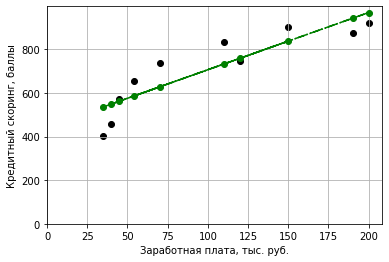

In [ ]:
plt.scatter(df['x'], df['y'], color =(0,0,0))
plt.plot(df['x'], df['y_pred'], 'g-.o') #g-. g-green; -. - штрих-пунктир, o-маркер для точки 
plt.xlabel('Заработная плата, тыс. руб.')
plt.ylabel('Кредитный скоринг, баллы')
plt.grid()
ax = plt.gca()
ax.set_xlim(xmin = 0)
ax.set_ylim(ymin = 0)
plt.show()

**3-ий способ нахождения коэффициентов с помощью матриц**

$\displaystyle\begin{pmatrix}y_1\\y_2\\y_3\\\dots\\y_n\end{pmatrix}=\begin{pmatrix}1\qquad x_1\\1\qquad x_2\\1\qquad x_3\\\dots\qquad \dots\\1\qquad x_n\end{pmatrix}\cdot\begin{pmatrix}a\\b\end{pmatrix}$  

Эту формулу удобно использовать при рассматривании многомерных линейных регрессий, т.е. когда рассматриаются зависимости более чем с 2 признаками.
Тогда вектор коэффициентов линейной регрессии $\hat B=\begin{pmatrix}a\\b\end{pmatrix}\text{ (для нашего примера)}$ находится по общей формуле:  
$\hat B=\left(X^{T}\cdot X\right)^{-1}\cdot X^{T}\cdot Y$  
Расчитаем:

In [ ]:
y=y.reshape((-1,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [ ]:
x=x.reshape((-1,1))
x=np.hstack([np.ones((len(x),1)),x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [ ]:
B=np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
B

array([[444.17735732],
       [  2.62053888]])

Иногда можно пренебречь величиной интерсепта, и тогда линейная взвимосвязь переменных будет описываться функцией вида:  
$y=b\cdot x$  
В этом случае, величина коэффициена $b$ так же расчитывается матричным методом, из формулы:  
$\displaystyle\begin{pmatrix}y_1\\y_2\\y_3\\\dots\\y_n\end{pmatrix}=\begin{pmatrix}x_1\\x_2\\x_3\\\dots\\x_n\end{pmatrix}\cdot\begin{pmatrix}b\end{pmatrix}$ 

In [ ]:
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [ ]:
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [ ]:
x = np.delete(x, 0, 1) # столбец с 1-и уже не нужен
x

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [ ]:
x

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [ ]:
B=np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
B

array([[5.88982042]])

In [ ]:
b_without_intersept = B[0]
b_without_intersept

array([5.88982042])

Уравнение регрессии без интерсепта имеет сл. вид (коэффициенты округлены до сотых): 

$$y = 5,89 \cdot x$$

С увеличением заработной платы заемщика на 1 тыс.руб. его поведенческий кредитный скоринг возрастает на 5,89 балла. Что более чем в 2 раза больше, чем в модели с интерсептом

Вычислим значения $\hat{y}$ по полученной модели регресси  без интерсепта:

In [ ]:
y_pred_without_intersept = b_without_intersept * x
y_pred_without_intersept

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

In [ ]:
df['y_pred_without_intersept'] = y_pred_without_intersept
df

,x,y,y_pred,y_pred_without_intersept
0,35,401,535.896218,206.143715
1,45,574,562.101607,265.041919
2,190,874,942.079745,1119.065880
3,200,919,968.285134,1177.964084
4,40,459,548.998913,235.592817
5,70,739,627.615079,412.287429
6,54,653,585.686457,318.050303
7,150,902,837.258190,883.473063
8,120,746,758.642023,706.778450
9,110,832,732.436634,647.880246


Добавим новую модель на график:

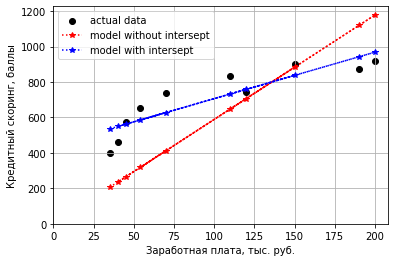

In [ ]:
plt.scatter(df['x'], df['y'], color =(0,0,0), label='actual data')
plt.plot(df['x'], df['y_pred_without_intersept'], 'r:*', label='model without intersept') #g-. r-red; :пунктир, *-маркер для точки 
plt.plot(df['x'], df['y_pred'], 'b:*', label='model with intersept') #b- b-blue; :-пунктир, *-маркер для точки 
plt.legend()
plt.xlabel('Заработная плата, тыс. руб.')
plt.ylabel('Кредитный скоринг, баллы')
plt.grid() #сетка
ax = plt.gca() # чтобы настроить оси
ax.set_xlim(xmin = 0)
ax.set_ylim(ymin = 0)
plt.show()

**4-ый способ нахождения коэффициентов с помощью функций Python**

In [ ]:
# Еще один самый круой метод с семинара: примерный тайминг от начала 2:22:00 
import statsmodels.api as sm 
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           0.000611
Time:                        10:51:49   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#**Задача 2**  
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

**Функциия потерь**  
$MSE=\frac{1}{n}\sum^{n}_{i=1}(\hat y_i-y_i)^2$    
показывает, насколько далеко истинные значения зависимого признака будут находиться от линии регресии(расчетных значений)    

In [ ]:
def Mse(b, my_x, my_y):
    return np.sum((b * my_x - my_y) **2 ) / len(my_x)

Посчитаем значение для вычесленного нами коэффициента $b=2.62$

In [ ]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) #zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #ks

In [ ]:
Mse(2.62, x, y)

203812.48504

Теперь попробуем подобрать такое значение коэффициента $b$ (пока без интерсепта)
, при котором $MSE\rightarrow 0$, используя свойства производной.  
Для этого вычислим производную нашей функции потерь:    

In [ ]:
def Mse_p(b,my_x,my_y):
    return (2 / len(my_x)) * np.sum((b * my_x - my_y) * my_x)

Визуализируем функцию mse на графике и ее производную

In [ ]:
b_graph = np.linspace(-13,25,100)
mse_graph = [Mse(i, x, y) for i in b_graph]
mse_p_graph = [Mse_p(i, x, y) for i in b_graph]

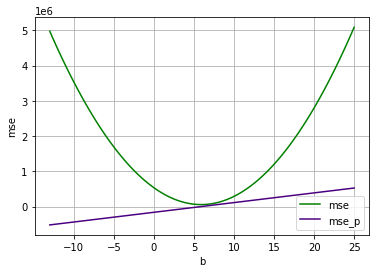

In [ ]:
plt.plot(b_graph, mse_graph, 'g', label='mse')
plt.plot(b_graph, mse_p_graph, 'indigo', label='mse_p') 
plt.legend()
plt.xlabel('b')
plt.ylabel('mse')
plt.grid() #сетка
# ax = plt.gca() # чтобы настроить оси
# ax.set_xlim(xmin = 0)
# ax.set_ylim(ymin = 0)
plt.show()

Введем параметр - **скорость обучения** c помощью которого будем регулировать скорость подбора коэффициента $b$

In [ ]:
alpha =1e-6

In [ ]:
b = 0.1
mse_min = Mse(b,x,y)
i_min = 1
b_min = b
for i in range(10000):
    b -= alpha * Mse_p(b,x,y)
    if i % 100 == 0:
        print(f'Итерация #{i},  b= {b}, mse = {Mse(b, x,y)}')
    if Mse(b,x,y) > mse_min:
        print(f'Итерация #{i_min}, b = {b_min}, mse = {mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min=Mse(b,x,y)
        i_min=i
        b_min=b

Итерация #0,  b= 0.25952808000000005, mse = 493237.7212546963
Итерация #100,  b= 5.54537842245223, mse = 58151.31823171113
Итерация #200,  b= 5.868748638669329, mse = 56522.97550129376
Итерация #300,  b= 5.888531320728348, mse = 56516.88130936019
Итерация #400,  b= 5.8897415574471985, mse = 56516.85850140053
Итерация #500,  b= 5.889815595583751, mse = 56516.858416040064
Итерация #600,  b= 5.889820124983314, mse = 56516.85841572062
Итерация #628, b = 5.889820285147628, mse = 56516.85841571966,
Достигнут минимум.


In [ ]:
b_min

5.889820285147628

#**Задача 3**  
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Функция потерь:

In [ ]:
def Mse_ab(a,b, x, y):
    return np.sum(((a + b * x) - y) ** 2) / len(x)

Частная производная функции потерь по $a$:  

In [ ]:
def Mse_pa(a,b,x,y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

Частная производная функции потерь по $b$:

In [ ]:
def Mse_pb(a,b,x,y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

Скорость обучения:

In [ ]:
alpha=5e-05

In [ ]:
b = 0.1
a = 0.1
mseab_min=Mse_ab(a,b,x,y)
i_min = 1
b_min = b
a_min = a
   
for i in range(1000000):
    a -= alpha * Mse_pa(a,b,x,y)
    b -= alpha * Mse_pb(a,b,x,y)
    if i % 50000 == 0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={Mse_ab(a, b, x, y)}')
    if Mse_ab(a, b,x,y)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=Mse_ab(a, b,x,y)
        i_min = i
        b_min = b
        a_min = a
print(f'a={a_min}\nb={b_min}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444

In [ ]:
a_min, b_min

(444.17653163778414, 2.62054495966686)

Все ок